In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
import math
from matplotlib import style

In [2]:
data = pd.read_csv("student-mat.csv",sep=";")
# print(data.columns)
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [3]:
predict = "G3"

# Training data data frame without predict(G3)
x = np.array(data.drop([predict], axis=1))

#data to predict
y = np.array(data[predict])

In [4]:
x_train,x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.1)

In [5]:
best = 0
for __ in range(500):

# x_train a postion of x(training data ) & y_train is a portion of y data(predicted data) and x & test
# is determined by test_size which is 10% of the training data
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.1)

#Building the linear regression model, fitting datat into in that model and measure score against data
    linear = linear_model.LinearRegression()
    linear.fit(x_train,y_train)
    accuracy = linear.score(x_test,y_test)

    if accuracy > best:
        best = accuracy
        with open("studentModel.pickle","wb") as f:
            pickle.dump(linear, f)

In [6]:
# print(f"Accuracy is {accuracy}")

# with open("studentModel.pickle","wb") as f:
#     pickle.dump(linear,f)
'''
saving model with high accuracy in pickle file and loading that 
instead of retraining the model
'''
pickle_in = open("studentModel.pickle", "rb")
linear = pickle.load(pickle_in)

In [7]:
predictions = linear.predict(x_test)

In [8]:
for i in range(len(predictions)):
    print(f"My prediction : {math.floor(predictions[i])} || Test data: {x_test[i]} || Actual result: {y_test[i]}")

My prediction : 4 || Test data: [7 6 1 1 0] || Actual result: 0
My prediction : 17 || Test data: [16 17  2  0  0] || Actual result: 17
My prediction : 10 || Test data: [ 8 11  2  0  0] || Actual result: 11
My prediction : 11 || Test data: [12 12  1  0  2] || Actual result: 14
My prediction : 15 || Test data: [15 15  2  0 10] || Actual result: 15
My prediction : 12 || Test data: [12 12  2  0 13] || Actual result: 13
My prediction : -1 || Test data: [8 0 1 0 0] || Actual result: 0
My prediction : 7 || Test data: [9 8 2 1 0] || Actual result: 0
My prediction : 11 || Test data: [ 8 12  1  0  0] || Actual result: 12
My prediction : 11 || Test data: [11 12  2  0 10] || Actual result: 13
My prediction : 12 || Test data: [14 12  2  0 20] || Actual result: 13
My prediction : 16 || Test data: [15 16  2  0  2] || Actual result: 16
My prediction : -2 || Test data: [6 0 2 0 0] || Actual result: 0
My prediction : 6 || Test data: [7 7 1 0 3] || Actual result: 8
My prediction : 7 || Test data: [8 9 1 

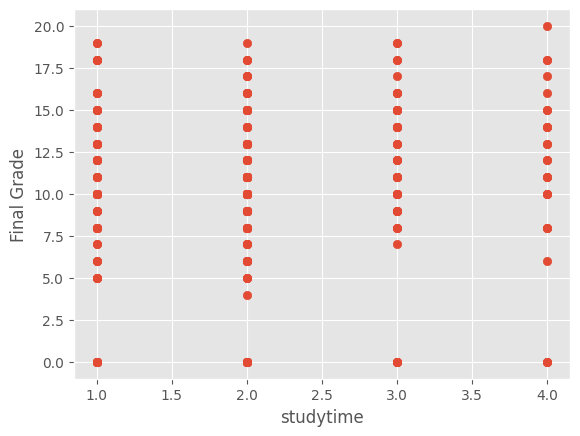

In [12]:
%matplotlib inline
p = "studytime"
style.use("ggplot")
plt.scatter(data["studytime"],data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()